**Implementing Various Learning Rules in Python**

In [2]:
import numpy as np

# Hebbian Learning Rule
def hebbian_learning(inputs, weights, learning_rate=0.1):
    for x in inputs:
        weights += learning_rate * x * x.T
    return weights

# Perceptron Learning Rule
def perceptron_learning(inputs, targets, weights, learning_rate=0.1, epochs=10):
    for epoch in range(epochs):
        for x, y in zip(inputs, targets):
            prediction = np.dot(x, weights)
            error = y - prediction
            weights += learning_rate * error * x
    return weights

# Delta Learning Rule
def delta_learning(inputs, targets, weights, learning_rate=0.1, epochs=10):
    for epoch in range(epochs):
        for x, y in zip(inputs, targets):
            prediction = np.dot(x, weights)
            error = y - prediction
            weights += learning_rate * error * x
    return weights

# Correlation Learning Rule
def correlation_learning(inputs, targets, weights, learning_rate=0.1):
    for x, y in zip(inputs, targets):
        weights += learning_rate * x * y
    return weights

# OutStar Learning Rule
def outstar_learning(inputs, weights, target, learning_rate=0.1):
    for x in inputs:
        weights += learning_rate * (target - weights) * x
    return weights

# Example usage
inputs = np.array([[1, 2], [3, 4], [5, 6]])
targets = np.array([1, 0, 1])
weights = np.array([0.5, -0.5])

# Applying learning rules
hebbian_weights = hebbian_learning(inputs, weights)
perceptron_weights = perceptron_learning(inputs, targets, weights)
delta_weights = delta_learning(inputs, targets, weights)
correlation_weights = correlation_learning(inputs, targets, weights)
outstar_weights = outstar_learning(inputs, weights, 1)

print("Hebbian Weights:", hebbian_weights)
print("Perceptron Weights:", perceptron_weights)
print("Delta Weights:", delta_weights)
print("Correlation Weights:", correlation_weights)
print("OutStar Weights:", outstar_weights)


Hebbian Weights: [1.33175802e+12 8.63206526e+11]
Perceptron Weights: [1.33175802e+12 8.63206526e+11]
Delta Weights: [1.33175802e+12 8.63206526e+11]
Correlation Weights: [1.33175802e+12 8.63206526e+11]
OutStar Weights: [1.33175802e+12 8.63206526e+11]


**Implementing Activation Functions and Plotting Their Graphs**

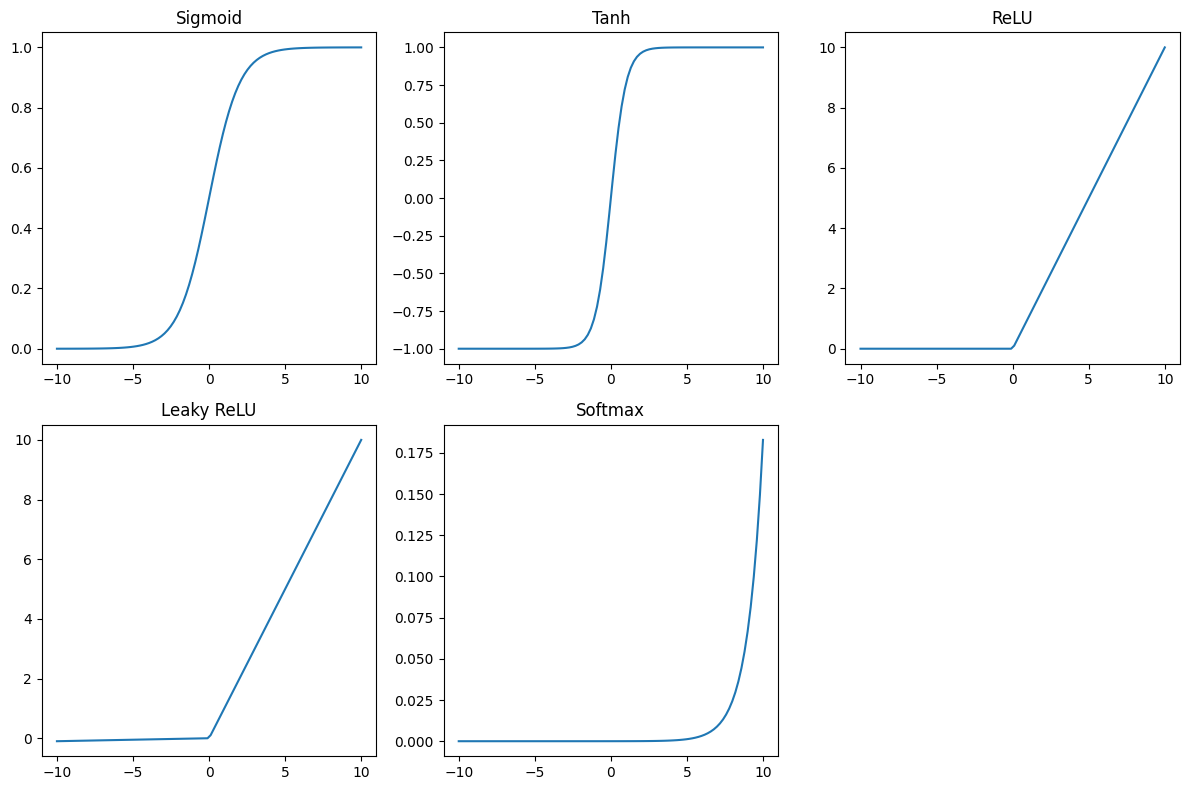

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

# Plotting activation functions
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid')

plt.subplot(2, 3, 2)
plt.plot(x, tanh(x))
plt.title('Tanh')

plt.subplot(2, 3, 3)
plt.plot(x, relu(x))
plt.title('ReLU')

plt.subplot(2, 3, 4)
plt.plot(x, leaky_relu(x))
plt.title('Leaky ReLU')

plt.subplot(2, 3, 5)
plt.plot(x, softmax(x))
plt.title('Softmax')

plt.tight_layout()
plt.show()


**Perceptron Network for Decision Making**

In [6]:
import numpy as np

def perceptron_decision(inputs, weights, bias):
    total_input = np.dot(inputs, weights) + bias
    return 1 if total_input > 0 else 0

# Example scenario
inputs = np.array([1, 0, 1])  # Favorite hero, not favorite heroine, good climate
weights = np.array([0.2, 0.4, 0.2])
bias = -0.5

# Calculate decision
decision = perceptron_decision(inputs, weights, bias)
print("Decision to go for a movie:", "Yes" if decision == 1 else "No")

# Calculate accuracy (assuming we have a dataset of inputs and expected outputs)
def calculate_accuracy(data, weights, bias):
    correct_predictions = 0
    for inputs, expected in data:
        prediction = perceptron_decision(inputs, weights, bias)
        if prediction == expected:
            correct_predictions += 1
    return correct_predictions / len(data)

# Example dataset
data = [
    (np.array([1, 0, 1]), 1),
    (np.array([0, 1, 0]), 0),
    (np.array([1, 1, 0]), 1),
    (np.array([0, 0, 1]), 0)
]

accuracy = calculate_accuracy(data, weights, bias)
print("Accuracy:", accuracy)


Decision to go for a movie: No
Accuracy: 0.75


** Image Processing Operations**

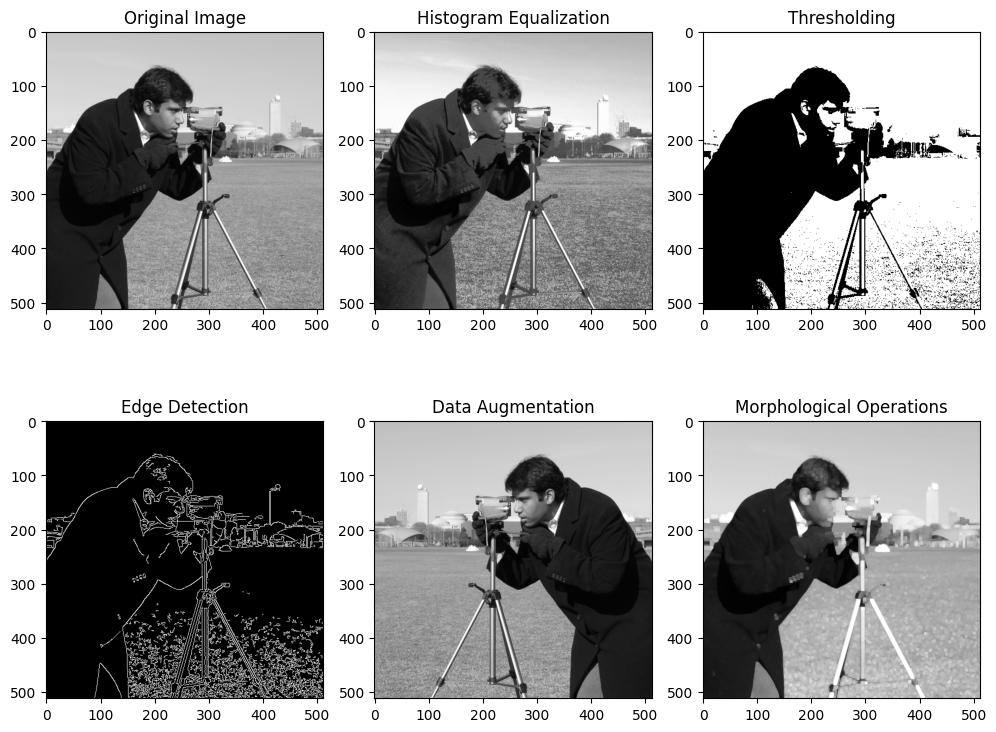

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float

# Load an example image
image = data.camera()

# Histogram Equalization
def histogram_equalization(image):
    img_eq = exposure.equalize_hist(image)
    return img_eq

# Thresholding
def thresholding(image, threshold_value=128):
    _, img_thresh = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return img_thresh

# Edge Detection
def edge_detection(image):
    edges = cv2.Canny(image, 100, 200)
    return edges

# Data Augmentation (example: flipping the image)
def data_augmentation(image):
    flipped_image = np.fliplr(image)
    return flipped_image

# Morphological Operations (example: dilation)
def morphological_operations(image):
    kernel = np.ones((5,5), np.uint8)
    dilation = cv2.dilate(image, kernel, iterations = 1)
    return dilation

# Apply operations
img_eq = histogram_equalization(image)
img_thresh = thresholding(image)
img_edges = edge_detection(image)
img_augmented = data_augmentation(image)
img_dilated = morphological_operations(image)

# Plot results
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title("Histogram Equalization")
plt.imshow(img_eq, cmap='gray')

plt.subplot(2, 3, 3)
plt.title("Thresholding")
plt.imshow(img_thresh, cmap='gray')

plt.subplot(2, 3, 4)
plt.title("Edge Detection")
plt.imshow(img_edges, cmap='gray')

plt.subplot(2, 3, 5)
plt.title("Data Augmentation")
plt.imshow(img_augmented, cmap='gray')

plt.subplot(2, 3, 6)
plt.title("Morphological Operations")
plt.imshow(img_dilated, cmap='gray')

plt.tight_layout()
plt.show()


**Image Style Transfer using TensorFlow Hub**

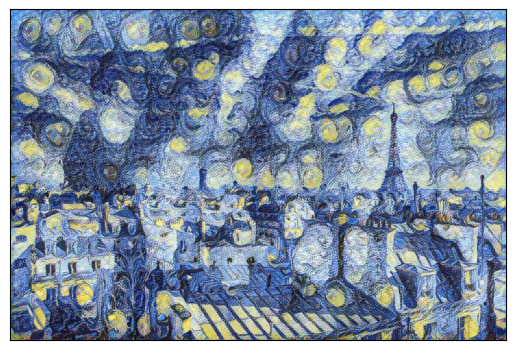

In [5]:
import tensorflow_hub as hub
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops import np_config; np_config.enable_numpy_behavior()

def load_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img/255.
    return img

content_image = load_img('/content/F28w3Ac.jpeg')
style_1 = load_img('/content/9ooB60I.jpeg')

model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

def apply_style(content_image, style):
  content_image = content_image.reshape(1, content_image.shape[0], content_image.shape[1], content_image.shape[2]).astype('float32')
  content_image = tf.convert_to_tensor(content_image)
  style = cv2.resize(style, (256,256))
  style = style.reshape(1, style.shape[0], style.shape[1], style.shape[2]).astype('float32')
  outputs = model(tf.constant(content_image), tf.constant(style))
  stylized_image = outputs[0]
  return stylized_image

img = apply_style(content_image, style_1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(img[0])
plt.show()

**6 cifar 10 dataset**

Epoch 1/20
782/782 [==============================] - 4s 5ms/step - loss: 1.9357 - accuracy: 0.3164 - val_loss: 1.9190 - val_accuracy: 0.3501
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 1.8451 - accuracy: 0.3555 - val_loss: 1.9166 - val_accuracy: 0.3331
Epoch 3/20
782/782 [==============================] - 2s 3ms/step - loss: 1.8096 - accuracy: 0.3697 - val_loss: 1.8842 - val_accuracy: 0.3485
Epoch 4/20
782/782 [==============================] - 2s 3ms/step - loss: 1.8007 - accuracy: 0.3780 - val_loss: 1.7948 - val_accuracy: 0.3685
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 1.7894 - accuracy: 0.3843 - val_loss: 1.8778 - val_accuracy: 0.3521
Epoch 6/20
782/782 [==============================] - 3s 3ms/step - loss: 1.7817 - accuracy: 0.3857 - val_loss: 1.7947 - val_accuracy: 0.3792
Epoch 7/20
782/782 [==============================] - 2s 3ms/step - loss: 1.7661 - accuracy: 0.3908 - val_loss: 1.7640 - val_accuracy: 0.3833
Epoch 

'Ship'

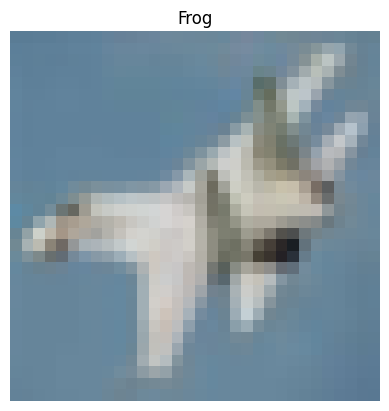

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

cifar_10_classes = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]

x_train.shape

import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.title(cifar_10_classes[y_train[0][0]])
plt.axis("off")

X_train = x_train / 255.0
X_test = x_test / 255.0

one_hot_encoder = OneHotEncoder()
y_train = one_hot_encoder.fit_transform(y_train).toarray()
y_test = one_hot_encoder.transform(y_test).toarray()

softmax_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(10, activation='softmax')
])


softmax_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])


softmax_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

new_image = x_test[10]
plt.imshow(new_image)
plt.axis("off")

img = np.expand_dims(new_image, axis=0)

img.shape
pred = softmax_model.predict(img)
prediction = np.argmax(pred)
cifar_10_classes[prediction]


**7 CNN for Handwritten Digit Classification using MNIST**

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 25s 9ms/step - loss: 0.1561 - accuracy: 0.9515 - val_loss: 0.0490 - val_accuracy: 0.9848
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0358 - val_accuracy: 0.9886
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0328 - accuracy: 0.9897 - val_loss: 0.0282 - val_accuracy: 0.9909
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.0363 - val_accuracy: 0.9886
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0271 - val_accuracy: 0.9908
313/313 - 1s - loss: 0.0271 - accuracy: 0.9908 - 619ms/epoch - 2ms/step
Test accuracy: 0.9908000230789185


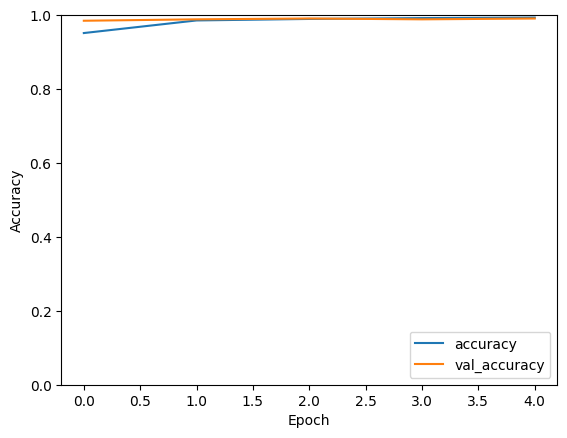

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Create the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


**8. Classify Underwater Sonar Signals using a Deep Learning Model**

Epoch 1/50
6/6 [==============================] - 1s 39ms/step - loss: 0.9323 - accuracy: 0.4880 - val_loss: 1.0471 - val_accuracy: 0.3810
Epoch 2/50
6/6 [==============================] - 0s 12ms/step - loss: 0.9294 - accuracy: 0.4759 - val_loss: 0.8877 - val_accuracy: 0.4048
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.9264 - accuracy: 0.4940 - val_loss: 0.7763 - val_accuracy: 0.5000
Epoch 4/50
6/6 [==============================] - 0s 13ms/step - loss: 0.7911 - accuracy: 0.5542 - val_loss: 0.7102 - val_accuracy: 0.5476
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6866 - accuracy: 0.6145 - val_loss: 0.6553 - val_accuracy: 0.6667
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 0.7311 - accuracy: 0.5723 - val_loss: 0.6127 - val_accuracy: 0.7143
Epoch 7/50
6/6 [==============================] - 0s 12ms/step - loss: 0.6970 - accuracy: 0.5542 - val_loss: 0.5738 - val_accuracy: 0.6905
Epoch 8/50
6/6 [===========

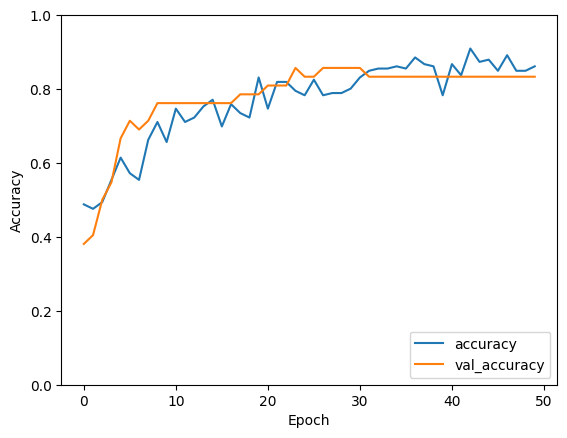

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('/content/sonar.csv', header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


11 question

12 question

17464789/17464789 [==============================] - 0s 0us/step


Epoch 1/10
782/782 [==============================] - 306s 385ms/step - loss: 0.4355 - accuracy: 0.7874 - val_loss: 0.3794 - val_accuracy: 0.8384
Epoch 2/10
782/782 [==============================] - 307s 393ms/step - loss: 0.2493 - accuracy: 0.9011 - val_loss: 0.3663 - val_accuracy: 0.8432
Epoch 3/10
782/782 [==============================] - 268s 343ms/step - loss: 0.1606 - accuracy: 0.9401 - val_loss: 0.3657 - val_accuracy: 0.8532
Epoch 4/10
782/782 [==============================] - 271s 347ms/step - loss: 0.1028 - accuracy: 0.9648 - val_loss: 0.5082 - val_accuracy: 0.8296
Epoch 5/10
782/782 [==============================] - 275s 351ms/step - loss: 0.0641 - accuracy: 0.9781 - val_loss: 0.5515 - val_accuracy: 0.8386
Epoch 6/10
782/782 [==============================] - 276s 353ms/step - loss: 0.0424 - accuracy: 0.9857 - val_loss: 0.6629 - val_accuracy: 0.8338
Epoch 7/10
782/782 [==============================] - 307s 391ms/step - loss: 0.0306 - accuracy: 0.9896 - val_loss: 0.7790 -

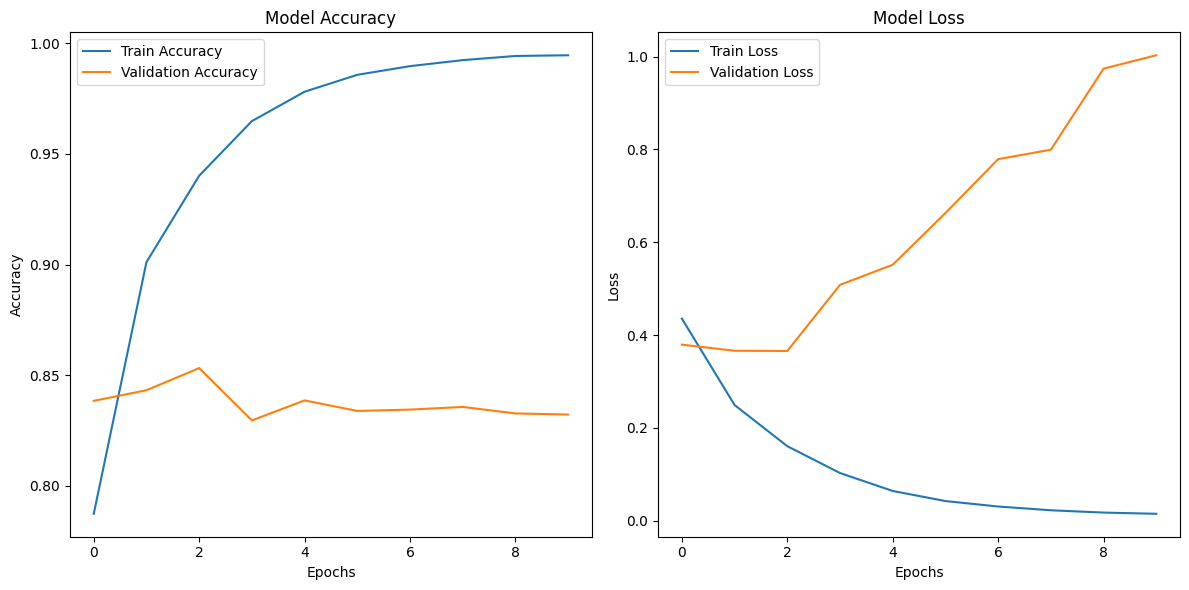

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load the IMDB dataset
max_features = 10000
maxlen = 100
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build the GRU-based RNN model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


DC GAN to simulate images

2/2 [==============================] - 0s 7ms/step


0 [D loss: 0.6395911276340485 | D accuracy: 47.65625] [G loss: 0.4562193751335144]
1/1 [==============================] - 0s 113ms/step


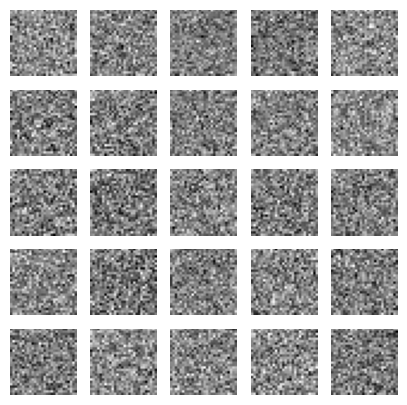

2/2 [==============================] - 0s 4ms/step
1000 [D loss: 0.5725852251052856 | D accuracy: 75.0] [G loss: 0.9274482727050781]
1/1 [==============================] - 0s 25ms/step


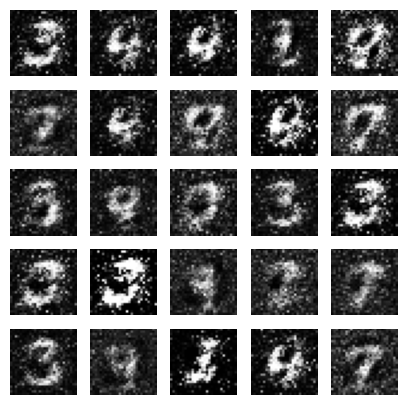

2/2 [==============================] - 0s 7ms/step
2000 [D loss: 0.5615843534469604 | D accuracy: 75.0] [G loss: 1.0519015789031982]
1/1 [==============================] - 0s 29ms/step


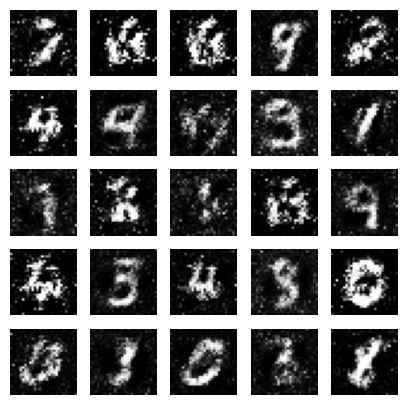

2/2 [==============================] - 0s 5ms/step
3000 [D loss: 0.5506434142589569 | D accuracy: 75.78125] [G loss: 1.056433916091919]
1/1 [==============================] - 0s 21ms/step


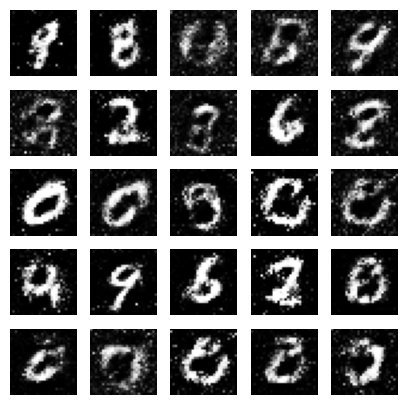

2/2 [==============================] - 0s 4ms/step
4000 [D loss: 0.6127010583877563 | D accuracy: 68.75] [G loss: 0.9782155752182007]
1/1 [==============================] - 0s 16ms/step


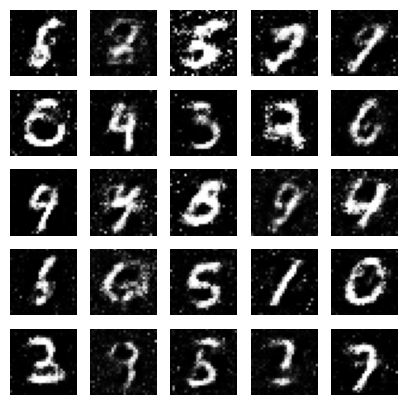

2/2 [==============================] - 0s 4ms/step
5000 [D loss: 0.6495699882507324 | D accuracy: 65.625] [G loss: 0.9322899580001831]
1/1 [==============================] - 0s 41ms/step


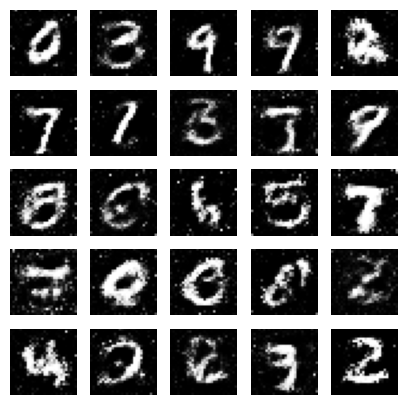

2/2 [==============================] - 0s 5ms/step
6000 [D loss: 0.6373366415500641 | D accuracy: 67.1875] [G loss: 0.9031810760498047]
1/1 [==============================] - 0s 27ms/step


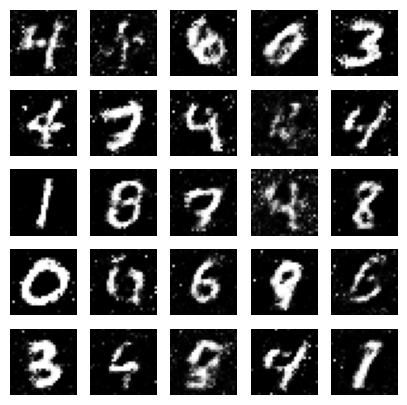

2/2 [==============================] - 0s 8ms/step
7000 [D loss: 0.7052576243877411 | D accuracy: 50.78125] [G loss: 0.9396478533744812]
1/1 [==============================] - 0s 23ms/step


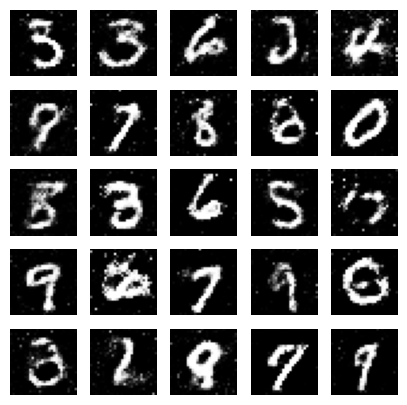

2/2 [==============================] - 0s 5ms/step
8000 [D loss: 0.6653837263584137 | D accuracy: 56.25] [G loss: 0.9137093424797058]
1/1 [==============================] - 0s 18ms/step


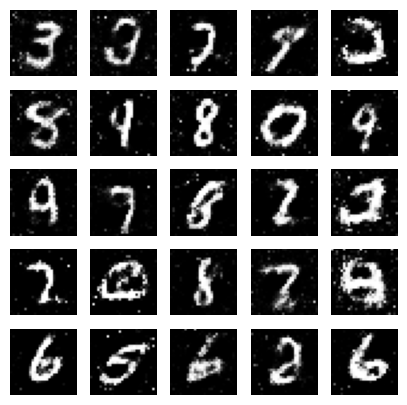

2/2 [==============================] - 0s 4ms/step
9000 [D loss: 0.615657240152359 | D accuracy: 65.625] [G loss: 0.9665058851242065]
1/1 [==============================] - 0s 23ms/step


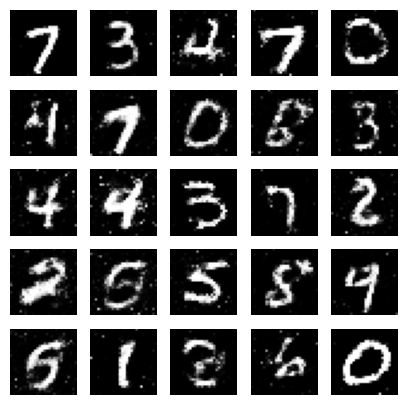

2/2 [==============================] - 0s 5ms/step


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
latent_dim = 100
image_shape = (28, 28, 1)  # Assuming 28x28 grayscale images
batch_size = 64
epochs = 10
sample_interval = 100

# Build the generator
def build_generator():
    model = Sequential([
        Dense(256, input_dim=latent_dim),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(512),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(1024),
        LeakyReLU(alpha=0.2),
        BatchNormalization(momentum=0.8),
        Dense(np.prod(image_shape), activation='tanh'),
        Reshape(image_shape)
    ])
    return model

# Build the discriminator
def build_discriminator():
    model = Sequential([
        Flatten(input_shape=image_shape),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dense(256),
        LeakyReLU(alpha=0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# Function to save generated images
def sample_images(generator, epoch, dim=(5, 5), figsize=(5, 5)):
    noise = np.random.normal(0, 1, (dim[0] * dim[1], latent_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)
    cnt = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()

# Compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build and compile the combined model
generator = build_generator()
z = tf.keras.Input(shape=(latent_dim,))
img = generator(z)
discriminator.trainable = False
valid = discriminator(img)
combined = tf.keras.Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Load and preprocess the dataset
(X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = np.expand_dims(X_train, axis=-1)

# Training the DCGAN
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_imgs = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(imgs, valid)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    g_loss = combined.train_on_batch(noise, valid)

    if epoch % sample_interval == 0:
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")
        sample_images(generator, epoch)


batch normalization

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist


(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])


model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

train_loss, train_acc = model.evaluate(X_train, y_train)
print("Train Loss:", train_loss)
print("Train accuracy:", train_acc)


test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3501 - accuracy: 0.8938 - val_loss: 0.1379 - val_accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1953 - accuracy: 0.9406 - val_loss: 0.1065 - val_accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1596 - accuracy: 0.9518 - val_loss: 0.0897 - val_accuracy: 0.9703
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1409 - accuracy: 0.9568 - val_loss: 0.0858 - val_accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1253 - accuracy: 0.9615 - val_loss: 0.0756 - val_accuracy: 0.9755
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1103 - accuracy: 0.9656 - val_loss: 0.0695 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1052 - accuracy: 0.9671 - val_loss: 0.0746 - val_accura